# Лабораторная работа 6. Построение пайплайна одномерной регрессии

## Подключение библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Загрузка данных и разделение на матрицу признаков и зависимую переменную

In [2]:
dataset = pd.read_csv('/content/data_pin_cvv.csv')
dataset.head()

,pin,cvv
0,2597,791
1,3146,637
2,7836,910
3,1665,564
4,1325,685


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[2597]
 [3146]
 [7836]
 [1665]
 [1325]]
Зависимая переменная
[791 637 910 564 685]


## Обработка пропущенных значений (если требуется)

In [4]:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])
# print(X)

## Обработка категориальных данных (если требуется)

### Замена категории кодом (LabelEncoder)

In [5]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder_y = LabelEncoder()
# print("Зависимая переменная до обработки")
# print(y)
# y = labelencoder_y.fit_transform(y)
# print("Зависимая переменная после обработки")
# print(y)

### Применение OneHotEncoder

In [6]:
# from sklearn.preprocessing import OneHotEncoder
# labelencoder_X = LabelEncoder()
# X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
# onehotencoder = OneHotEncoder(categorical_features = [0])
# X = onehotencoder.fit_transform(X).toarray()
# print("Перекодировка категориального признака")
# print(X)

## Разделение выборки на тестовую и тренировочную

In [7]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

## Обучение линейной модели регрессии

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Предсказание, обработка и визуализация результатов

In [9]:
y_pred = regressor.predict(X_test)
print(y_pred)

[506.26556137 509.8634244  506.94908023 517.12424751 522.97546945
 521.11519649 521.59340933 504.76081837 510.85990978 523.28843596
 512.2569923  516.77873248 516.80627354 514.48030641 521.80873029
 503.53148591 511.36315994 519.21486382 507.81036408 503.33869853
 521.77367804 509.7307266  522.39961106 518.61396812 509.7307266 ]


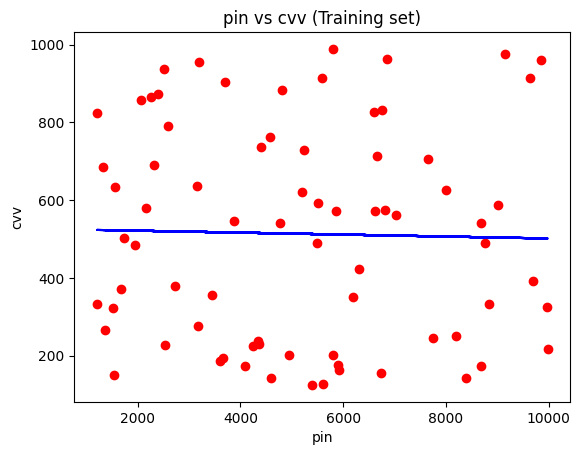

In [12]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('pin vs cvv (Training set)')
plt.xlabel('pin')
plt.ylabel('cvv')
plt.show()

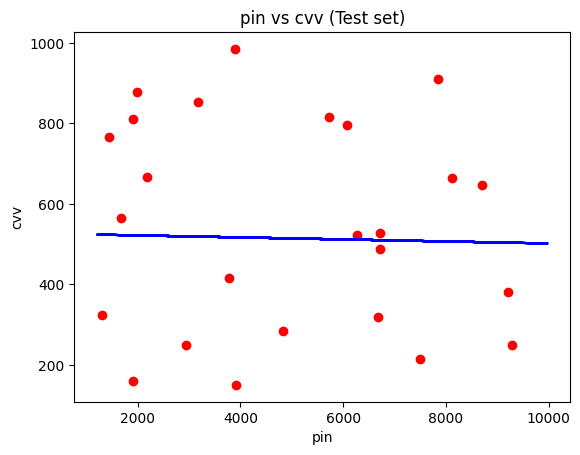

In [13]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('pin vs cvv (Test set)')
plt.xlabel('pin')
plt.ylabel('cvv')
plt.show()